# Crossing Angles and Hourglass Effect

0. [Calculation](#chapter0)
1. [Solving integral wrt s](#chapter1)
2. [Varying Parameters](#chapter2)\
    2.1 [$\beta^*$](#chapter2.1)\
    2.2 [$\phi_c$](#chapter2.2)\
    2.3 [$\epsilon_x$](#chapter2.3)\
    2.4 [$\epsilon_y$](#chapter2.4)\
    2.5 [$\sigma_z$](#chapter2.5)
3. [Incorporation of $s^*$](#chapter3)

## 0.  Calculation <a name="chapter0"></a>

### Change of coordinates:
$x_1 = x\cos\frac{\phi}{2} - s\sin\frac{\phi}{2}    s_1 = s\cos\frac{\phi}{2} + x\sin\frac{\phi}{2}$\
$x_2 = x\cos\frac{\phi}{2} + s\sin\frac{\phi}{2}    s_2 = s\cos\frac{\phi}{2} - x\sin\frac{\phi}{2}$

$L_0 = \frac{fN_1N_2}{4\pi\sigma_{0x}\sigma_{0y}}$\
where $\sigma_{0i} = \sqrt{\epsilon_i\beta}$\
and $\beta(s) = \beta^*(1 + (\frac{s}{\beta^*})^2)$

Relativistic Factor:\
$K = 2\cos^2\frac{\phi}{2}$

### Luminosity:
$L = 2\cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\rho_1(x_1, y_1, s_1, s_{01})\rho_2(x_2, y_2, s_2, s_{02})$ dxdydsds_0

$ = \cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{4\pi^3\beta^2\epsilon_x\epsilon_y\sigma_z^2}
\exp(-\frac{x_1^2}{2\sigma_x^2})\exp(-\frac{y_1^2}{2\sigma_y^2})\exp(-\frac{(s_1 - s_0)^2}{2\sigma_z^2}) 
\exp(-\frac{x_2^2}{2\sigma_x^2})\exp(-\frac{y_2^2}{2\sigma_y^2})\exp(-\frac{(s_2 + s_0)^2}{2\sigma_z^2})$
dxdydsds_0

Integrate wrt y and s0:

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^{5/2}\epsilon_x\sqrt{\epsilon_y}\sigma_z^2}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{\beta^2}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{(s_1^2 + s_2^2 + 2s_0^2 + 2s_0(s_2 - s_1)}{2\sigma_z^2})$ 
dxdsds_0

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\sigma_z}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{\beta^2}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{(s_1^2 + s_2^2 + 2(s_2 - s_1)^2}{2\sigma_z^2}) $
dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-(\frac{ s^2\sin^2(\frac{\phi}{2}) + x^2\cos^2(\frac{\phi}{2}) }{\beta\epsilon_x})) 
$exp$(-(\frac{ s^2\cos^2(\frac{\phi}{2}) + x^2\sin^2(\frac{\phi}{2}) }{\sigma_z^2}))$ dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-x^2(\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2} ))
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ dxds

Integrate wrt x:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

$= L_0\int_{-\infty}^{\infty}
\frac{\cos^2(\frac{\phi}{2})}{\sqrt{\pi}\sigma_{x0}(1 + (\frac{s}{\beta^*})^2)^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds


## 1. Solving integral wrt s: <a name="chapter1"></a>

In [7]:
# Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [35]:
#Integrand to evaluate wrt s
# Parameters given: f, N1, N2, beta_star, ex, ey, sz, phi
def Integrand(s, f, N1, N2, beta_star, ex, ey, sz, phi):
    beta = beta_star*(1 + (s/beta_star)**2)
    sx0 = np.sqrt(ex*beta_star)
    sy0 = np.sqrt(ey*beta_star)
    
    denom = (beta/beta_star)**(1.5)*sz*(np.cos(phi/2)**2/(beta*ex) + np.sin(phi/2)**2/sz**2)**.5*np.pi**.5*sx0
    num = np.exp(-s**2*(np.sin(phi/2)**2/(beta*ex) + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    L0 = f*N1*N2/(4*np.pi*sx0*sy0)
    return num/denom*np.cos(phi/2)**2*L0

In [36]:
# Random Initial conditions
f = 1
N1 = 1
N2 = 1
beta_star = .5
ex = 1E-8
ey = 1E-8
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
sz = 1
phi = 0#np.pi/180 #1 degree

# Bounds
a, b = -np.inf, np.inf

In [38]:
# Using Scipy
Luminosity_int = (lambda f, N1, N2, beta_star, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand, a, b, args = (f, N1, N2, beta_star, ex, ey, sz, phi))[0])

res = Luminosity_int(f, N1, N2, beta_star, ex, ey, sz, phi, a, b)
print("Luminosity:", res)

Luminosity: 8684151.9721145


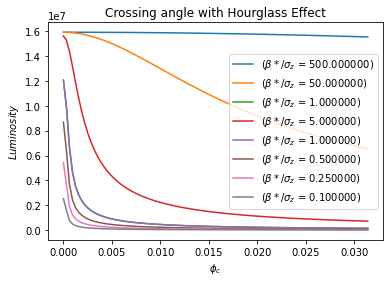

In [60]:
#Beta star constant
N = 100
Phi = np.linspace(0, np.pi/100, N + 1)
Luminosities = np.zeros(N + 1)
Sigma_z = np.array([.001, .01, .5, .1, .5, 1, 2, 5])
for s_z in Sigma_z:
    for i, p in enumerate(Phi):
        Luminosities[i] = Luminosity_int(f, N1, N2, beta_star, ex, ey, s_z, p, a, b)
    plt.plot(Phi, Luminosities, label = r"($\beta*/\sigma_z$ = %f)"%(beta_star/s_z))
plt.title(r"Crossing angle with Hourglass Effect")
plt.legend()
plt.ylabel(r"$Luminosity$")
plt.xlabel(r"$\phi_c$")
plt.show()

- As $\phi$ increases, the Luminosity will always go down.
- As $\beta^*/\sigma_z$ increases (hourglass factor), the maximum of the curve increases
- Asymtotic behavior of growing $\sigma_z$

## 2. Luminosity at a specific region with specific parameters <a name="chapter2"></a>
- $L_1$ is the integral evaluated between some bounds (s = -10 cm to s = 10 cm)
- $L_0$ is the integral evaluated over all of space
- Want to maximize $L_1$ while minimizing the difference between $L_0$ and $L_1$

In [45]:
# Initial conditions accurate to an experiment
# b*, ex, ey, sz, phi are given to determine luminosity
beta_star_param = .2 #m
sz_param = .2
ex_param = 1E-8 #microns
ey_param = 1E-8
phi_param = .002 #2 mrad

# Bounds
a_param, b_param = -.1, .1 #10 cm
L_1 = Luminosity_int(f, N1, N2, beta_star_param, sx_param, sy_param, sz_param, phi_param, a_param, b_param)

#infinity bounds
L_0 = Luminosity_int(f, N1, N2, beta_star_param, sx_param, sy_param, sz_param, phi_param, a, b)

print("Luminosity with given parameters (want to maximize):", L_1)
print("Luminosity at infinite bound:", L_0)
print("Difference (want to minimize):", L_0 - L_1)

Luminosity with given parameters (want to maximize): 1929.4306828994022
Luminosity at infinite bound: 3014.38866377331
Difference (want to minimize): 1084.9579808739077


### 2.1 Varying $\beta^*$ <a name="chapter2.1"></a>

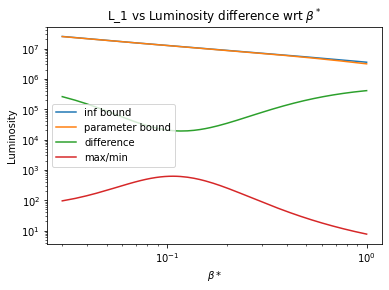

In [68]:
# Plot both with respect to beta_star
N = 200
Beta_star = np.linspace(.03, 1, N + 1)
L_1_plot = np.zeros(N + 1)
L_0_plot = np.zeros(N + 1)
for i, bs in enumerate(Beta_star):
    #integral from a_param to b_param
    L_1_plot[i] = Luminosity_int(f, N1, N2, bs, ex_param, ey_param, sz_param, phi_param, a_param, b_param)
    #integral from -inf to inf
    L_0_plot[i] = Luminosity_int(f, N1, N2, bs, ex_param, ey_param, sz_param, phi_param, a, b)
    
plt.plot(Beta_star, L_0_plot, label = "inf bound")
plt.plot(Beta_star, L_1_plot, label = "parameter bound")
plt.plot(Beta_star, L_0_plot - L_1_plot, label = "difference")

curve_beta_star = (L_1_plot/(L_0_plot - L_1_plot)) #maximize/minimize
plt.plot(Beta_star, curve_beta_star, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\beta^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta*$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [69]:
beta_star_max = Beta_star[np.argmax(curve_beta_star)]
print("Beta star for max Luminosity:", beta_star_max)

Beta star for max Luminosity: 0.1076


### 2.2 Varying $\phi_c$ <a name="chapter2.2"></a>

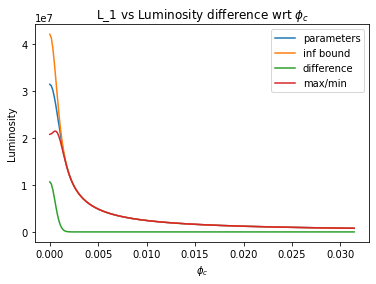

In [71]:
# Plot with respect to Phi
Phi = np.linspace(0, np.pi/100, N + 1)
L_1_plot2 = np.zeros(N + 1)
L_0_plot2 = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plot2[i] = Luminosity_int(f, N1, N2, beta_star_max, ex_param, ey_param, sz_param, p, a_param, b_param)
    L_0_plot2[i] = Luminosity_int(f, N1, N2, beta_star_max, ex_param, ey_param, sz_param, p, a, b)
plt.plot(Phi, L_1_plot2, label = "parameters")
plt.plot(Phi, L_0_plot2, label = "inf bound")
plt.plot(Phi, L_0_plot2 - L_1_plot2, label = "difference")

curve_phi = L_1_plot2 - (L_0_plot2 - L_1_plot2)
plt.plot(Phi, curve_phi, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\phi_c$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\phi_c$")
plt.legend()
plt.show()

In [72]:
phi_max = Phi[np.argmax(curve_phi)]
print("Phi for max Luminosity:", phi_max)

Phi for max Luminosity: 0.0006283185307179587


### 2.3 Varying $\epsilon_x$ <a name="chapter2.3"></a>

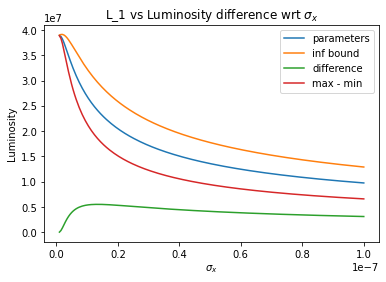

In [84]:
# Plot with respect to eps_x
Eps_x = np.linspace(1E-9, 1E-7, N + 1) #m
L_1_plot3 = np.zeros(N + 1)
L_0_plot3 = np.zeros(N + 1)
for i, e_x in enumerate(Eps_x):
    L_1_plot3[i] = Luminosity_int(f, N1, N2, beta_star_max, e_x, ey_param, sz_param, phi_max, a_param, b_param)
    L_0_plot3[i] = Luminosity_int(f, N1, N2, beta_star_max, e_x, ey_param, sz_param, phi_max, a, b)
plt.plot(Eps_x, L_1_plot3, label = "parameters")
plt.plot(Eps_x, L_0_plot3, label = "inf bound")
plt.plot(Eps_x, L_0_plot3 - L_1_plot3, label = "difference")

curve_eps_x = L_1_plot3 - (L_0_plot3 - L_1_plot3)
plt.plot(Eps_x, curve_eps_x, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_x$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_x$")
plt.legend()
plt.show()

In [85]:
eps_x_max = Eps_x[np.argmax(curve_eps_x)]
print("epsilon_x for max Luminosity:", eps_x_max)

epsilon_x for max Luminosity: 1e-09


### 2.4 Varying $\epsilon_y$ <a name="chapter2.4"></a>

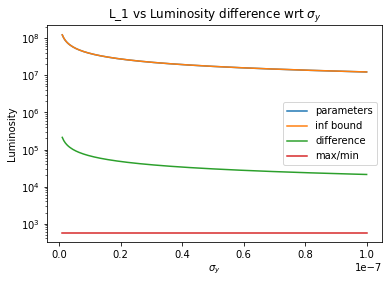

In [95]:
# Plot with respect to eps_y
Eps_y = np.linspace(1E-9, 1E-7, N + 1) #m
L_1_plot4 = np.zeros(N + 1)
L_0_plot4 = np.zeros(N + 1)
for i, e_y in enumerate(Eps_y):
    L_1_plot4[i] = Luminosity_int(f, N1, N2, beta_star_max, eps_x_max, e_y, sz_param, phi_max, a_param, b_param)
    L_0_plot4[i] = Luminosity_int(f, N1, N2, beta_star_max, eps_x_max, e_y, sz_param, phi_max, a, b)
plt.plot(Eps_y, L_1_plot4, label = "parameters")
plt.plot(Eps_y, L_0_plot4, label = "inf bound")
plt.plot(Eps_y, L_0_plot4 - L_1_plot4, label = "difference")

curve_eps_y = L_1_plot4/(L_0_plot4 - L_1_plot4)
plt.plot(Eps_y, curve_eps_y, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_y$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_y$")
plt.yscale("log")
plt.legend()
plt.show()

In [96]:
eps_y_max = Eps_y[np.argmax(curve_eps_y)]
print("epsilon_y for max Luminosity:", eps_y_max)

epsilon_y for max Luminosity: 5.297500000000001e-08


### 2.5 Varying $\sigma_z$ <a name="chapter2.5"></a>

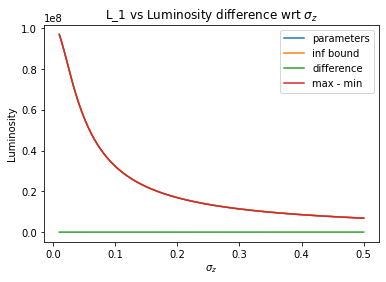

In [100]:
# Plot with respect to sigma_z
Sigma_z = np.linspace(.01, .5, N + 1)
L_1_plot5 = np.zeros(N + 1)
L_0_plot5 = np.zeros(N + 1)
for i, s_z in enumerate(Sigma_z):
    L_1_plot5[i] = Luminosity_int(f, N1, N2, beta_star_max, eps_x_max, eps_y_max, s_z, phi_max, a_param, b_param)
    L_0_plot5[i] = Luminosity_int(f, N1, N2, beta_star_max, eps_x_max, eps_y_max, s_z, phi_max, a, b)
plt.plot(Sigma_z, L_1_plot5, label = "parameters")
plt.plot(Sigma_z, L_0_plot5, label = "inf bound")
plt.plot(Sigma_z, L_0_plot5 - L_1_plot5, label = "difference")

curve_sigma_z = L_1_plot5 - (L_0_plot5 - L_1_plot5)
plt.plot(Sigma_z, curve_sigma_z, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_z$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_z$")
plt.legend()
plt.show()

In [102]:
eps_z_max = Sigma_z[np.argmax(curve_sigma_z)]
print("epsilon_z for max Luminosity:", eps_z_max)

epsilon_z for max Luminosity: 0.01


## 3. s-offset ($\vec{s}^*$) <a name="chapter3"></a>

Integrate integrand but now $\vec{s}^* \neq$ 0 at IP:\
$\beta(s) = \beta^*(1 + (\frac{(s - s^*)}{\beta^*})^2)$

This also means that $\beta(s)$ will be different for x and y as well:\
$\beta_i(s) = \beta^*(1 + (\frac{(s - s_i^*)}{\beta^*})^2); i = x, y$

Combine with previous result:\
$L = L_0\int_{-\infty}^{\infty}
\frac{\cos^2(\frac{\phi}{2})}{\sqrt{\pi}\sigma_{x0}\frac{\beta_x(s)}{\beta^*}\sqrt{\frac{\beta_y(s)}{\beta^*}}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta_x(s)\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta_x(s)\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

In [103]:
#Integrand with s* to evaluate wrt s
# Parameters given: f, N1, N2, s*_x, s*_y, beta_star, ex, ey, sz, phi
def Integrand_s_star(s, f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi):
    beta_x = beta_star*(1 + ((s - s_star_x)/beta_star)**2)
    beta_y = beta_star*(1 + ((s - s_star_y)/beta_star)**2)
    sx0 = np.sqrt(ex*beta_star)
    sy0 = np.sqrt(ey*beta_star)
    
    denom = (np.pi**.5*sx0*(beta_x/beta_star)*(beta_y/beta_star)**.5*sz*
             (np.cos(phi/2)**2/(beta_x*ex) + np.sin(phi/2)**2/sz**2)**.5)
    num = np.exp(-s**2*(np.sin(phi/2)**2/(beta_x*ex) + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    L0 = f*N1*N2/(4*np.pi*sx0*sy0)
    return num/denom*np.cos(phi/2)**2*L0

In [104]:
# s* initial conditions
# if want to change other parameters, go to sec 1
s_star_x = 0
s_star_y = 0

In [106]:
# Using Scipy
Luminosity_int_s_star = (lambda f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand_s_star, a, b, 
                        args = (f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi))[0])
res_s_star0 = Luminosity_int_s_star(f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, a, b)

print("Normalized Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), res_s_star0)

Normalized Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 8684151.9721145


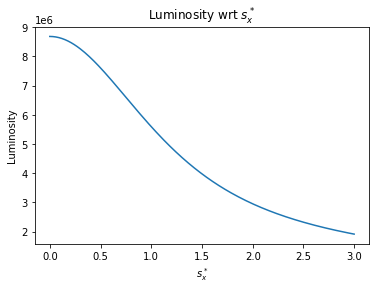

In [107]:
S_star_x = np.linspace(0, 3, N + 1)
Luminosities_s_star_x = np.zeros(N + 1)
for i, s_s_x in enumerate(S_star_x):
    Luminosities_s_star_x[i] = Luminosity_int_s_star(f, N1, N2, s_s_x, s_star_y, beta_star, ex, ey, sz, phi, a, b)
plt.plot(S_star_x, Luminosities_s_star_x)
plt.title(r"Luminosity wrt $s_x^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_x^*$")
plt.show()

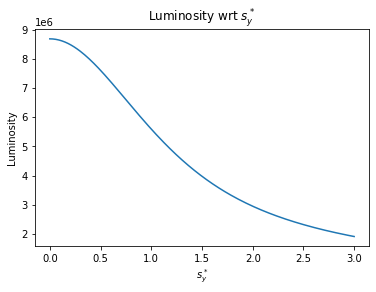

In [108]:
S_star_y = np.linspace(0, 3, N + 1)
Luminosities_s_star_y = np.zeros(N + 1)
for i, s_s_y in enumerate(S_star_y):
    Luminosities_s_star_y[i] = Luminosity_int_s_star(f, N1, N2, s_star_x, s_s_y, beta_star, ex, ey, sz, phi, a, b)
plt.plot(S_star_y, Luminosities_s_star_y)
plt.title(r"Luminosity wrt $s_y^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_y^*$")
plt.show()